In [1]:
# Elaborar un modelo predictivo aplicando el algoritmo de Regresión
# Logística para resolver un problema de clasificación utilizando el
# lenguaje Python.

# El archivo rrhh.csv contiene información de la situación laboral de los
# trabajadores de la empresa ABAC. Las variables disponibles son:
# Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0:
# vinculado).
# Edad: Edad del trabajador en años.
# Ratio.Pago: Medida de pago por hora (numerico)
# Salario: Salario mensual en dólares que tiene o tenía el trabajador
# Dias.trabajados: Días que lleva o llevaba trabajando en la empresa
# Ausencias: Días que ha faltado a trabajar
# Sexo: Sexo del trabajador (Female , Male)

# Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3:
# separado, 4: soltero, 5: viuda)
# Departamento: Lugar de trabajo en la empresa (Admin Offices,..)
# Posicion: Cargo del trabajador/empleado (Accountant I ,.... )
# Desempeño: Clasificación del desempeño del trabajador.





In [30]:
# 1. Cargue los datos y revise los formatos de cada variable, recuerde
# codificar las variables como numéricas o factores según corresponda.

import pandas as pd
import numpy as np

df = pd.read_csv('rrhh.csv', sep=',')

# casteo de variables estado, sexo y estado civil a categoricas
df['Estado'] = df['Estado'].astype('category')
df['Sexo'] = df['Sexo'].astype('category')
df['Estado.Civil'] = df['Estado.Civil'].astype('category')
df['Departamento'] = df['Departamento'].astype('category')
df['Posicion'] = df['Posicion'].astype('category')

df.head()
print()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Estado           310 non-null    category
 1   Edad             310 non-null    float64 
 2   Ratio.Pago       310 non-null    float64 
 3   Salario          310 non-null    float64 
 4   Dias.trabajados  310 non-null    int64   
 5   Ausencias        310 non-null    int64   
 6   Sexo             310 non-null    category
 7   Estado.Civil     310 non-null    category
 8   Departamento     310 non-null    category
 9   Posicion         310 non-null    category
 10  Desempeño        310 non-null    object  
dtypes: category(5), float64(3), int64(2), object(1)
memory usage: 18.1+ KB


In [32]:
# 2. Realice un análisis descriptivo de sus datos. Determinar si existen
# observaciones faltantes, en el caso de existir tome la decisión de
# omitirlas del estudio u omitir la variable. Evalúe si existen posibles
# incongruencias en la fuente de datos (ej: edades negativas). Y
# finalmente análice la presencia de valores atípicos en las variables.
# Comente.

df.describe()
print('Valores nulos (is null)')
print(df.isnull().sum()) # no hay valores nulos
print()
print('Valores nulos (is isna)')
print(df.isna().sum()) # no hay valores nulos
print()
print('Edades negativas')
print(df['Edad'].min()) # no hay edades negativas
print()
print('Edades fuera de rango')
print(df['Edad'].max())
print()
print("Notas:")
print("Respecto de la consistencia de datos se puede ver que no hay valores nulos")
print("ni edades negativas, pero si hay edades fuera de rango (mayores a 100 años)")
print("se puede ver que hay 2 valores atipicos en la variable edad")
print()
print("Las variables que tienen valores atipicos son: salario, dias trabajados y ausencias")
print("se puede ver en los boxplot que hay valores atipicos en estas variables")




Valores nulos (is null)
Estado             0
Edad               0
Ratio.Pago         0
Salario            0
Dias.trabajados    0
Ausencias          0
Sexo               0
Estado.Civil       0
Departamento       0
Posicion           0
Desempeño          0
dtype: int64

Valores nulos (is isna)
Estado             0
Edad               0
Ratio.Pago         0
Salario            0
Dias.trabajados    0
Ausencias          0
Sexo               0
Estado.Civil       0
Departamento       0
Posicion           0
Desempeño          0
dtype: int64

Edades negativas
25.0

Edades fuera de rango
67.0

Notas:
Respecto de la consistencia de datos se puede ver que no hay valores nulos
ni edades negativas, pero si hay edades fuera de rango (mayores a 100 años)
se puede ver que hay 2 valores atipicos en la variable edad

Las variables que tienen valores atipicos son: salario, dias trabajados y ausencias
se puede ver en los boxplot que hay valores atipicos en estas variables


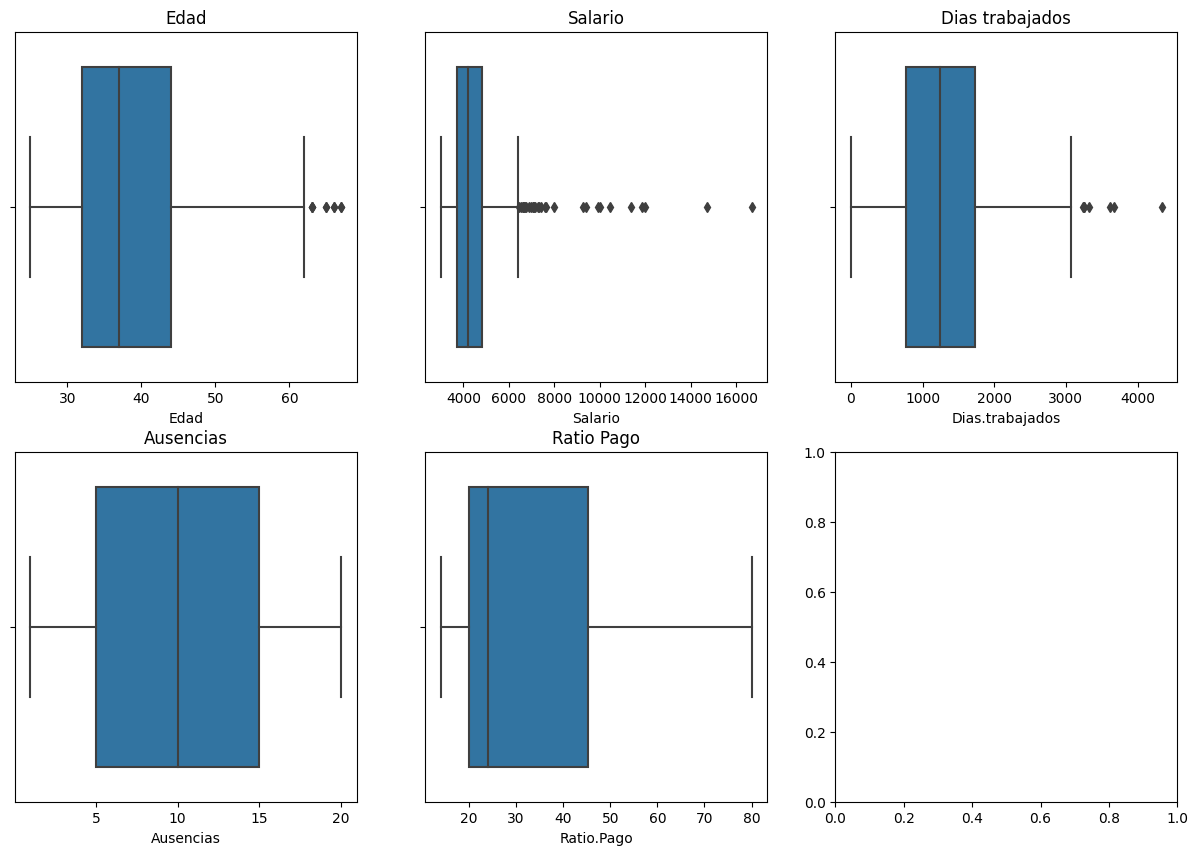

In [33]:
# datos atipicos en la variable salario
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
sns.boxplot(x=df['Edad'], ax=axs[0, 0])
axs[0, 0].set_title('Edad')
sns.boxplot(x=df['Salario'], ax=axs[0, 1])
axs[0, 1].set_title('Salario')
sns.boxplot(x=df['Dias.trabajados'], ax=axs[0, 2])
axs[0, 2].set_title('Dias trabajados')

sns.boxplot(x=df['Ausencias'], ax=axs[1, 0])
axs[1, 0].set_title('Ausencias')
sns.boxplot(x=df['Ratio.Pago'], ax=axs[1, 1])
axs[1, 1].set_title('Ratio Pago')
plt.show()

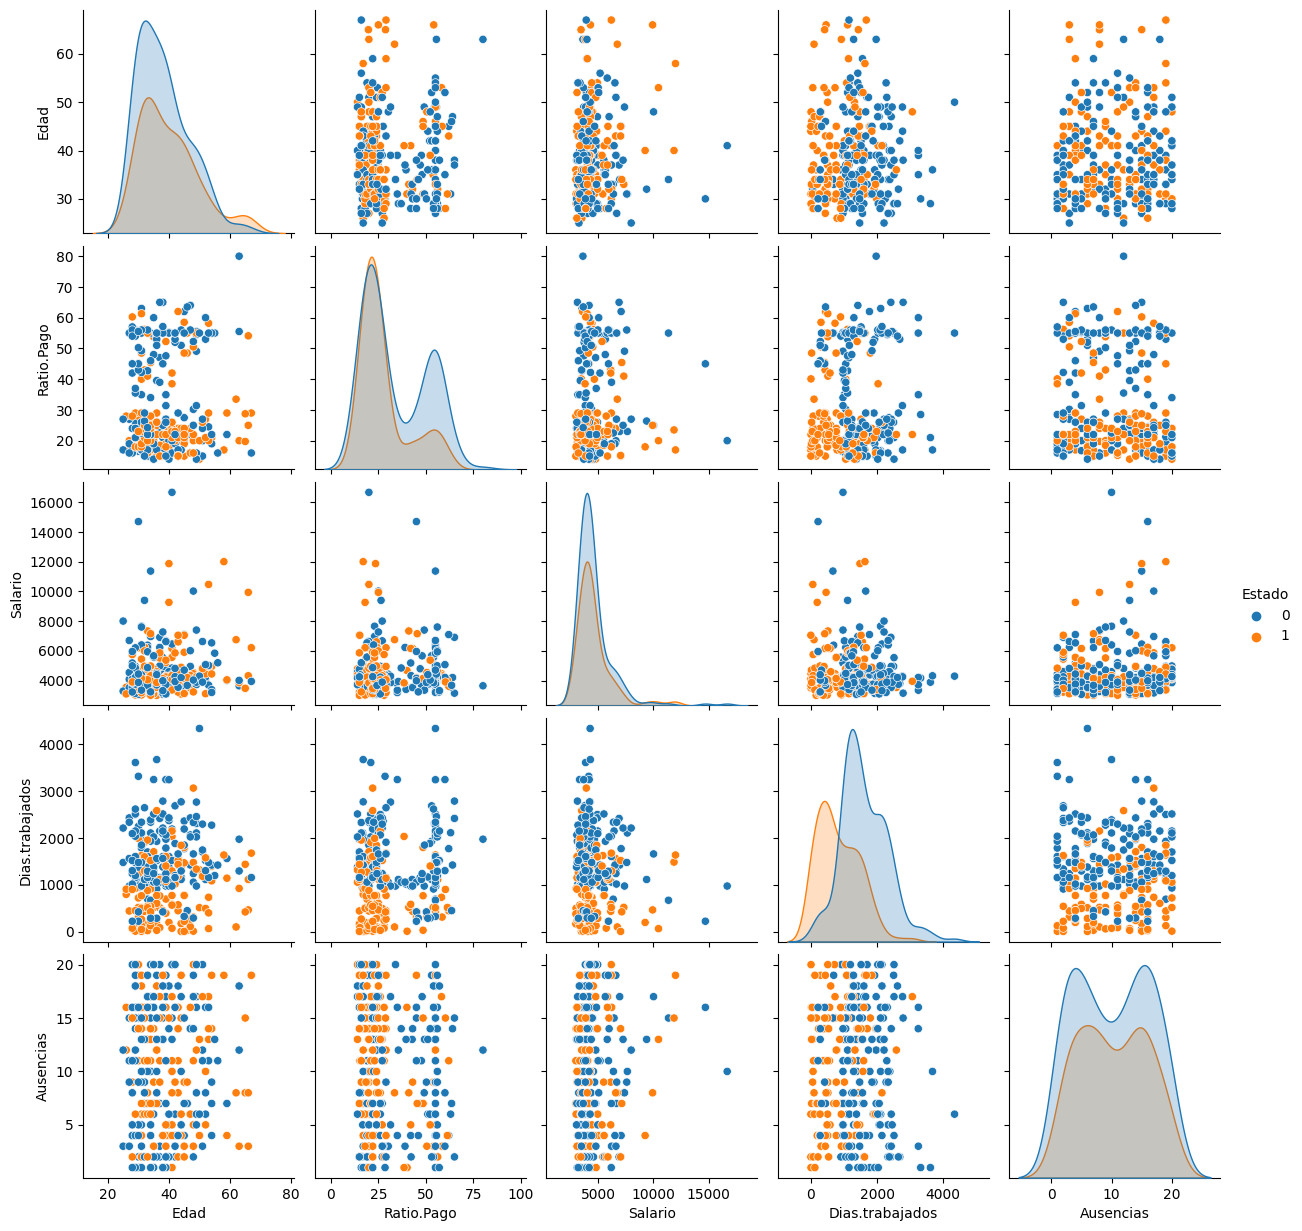

In [34]:
# 3. Realice análisis de cómo se relacionan las variables continuas con la
# variable de interés. Acompañe con gráficos y estadísticas. 
#
# ¿Qué variables pudieran resultar significativas a la hora de modelar la
# probabilidad de que el trabajador sea desvinculado a la empresa?

sns.pairplot(df, hue='Estado') 
plt.show()


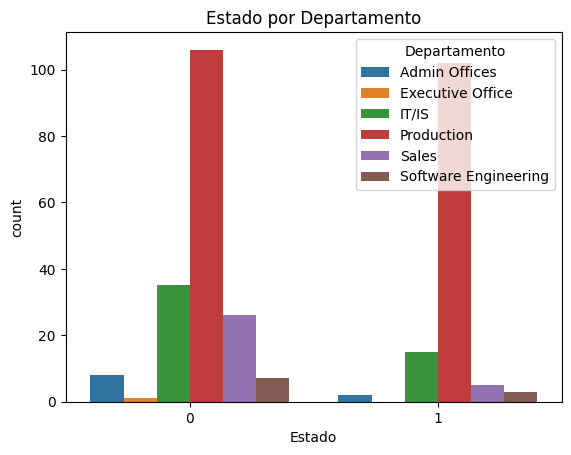

Departamento,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering,All
Estado,,,,,,,
0,0.8,1.0,0.7,0.509615,0.83871,0.7,0.590323
1,0.2,0.0,0.3,0.490385,0.16129,0.3,0.409677


In [35]:
# 4. Realice análisis de cómo se relacionan las variables categóricas con la
# variable de interés. Acompañe con gráficos y estadísticas. 

# ¿Qué variables pudieran resultar significativas a la hora de modelar la
# probabilidad de que el trabajador sea desvinculado a la empresa?

# departamento
sns.countplot(x='Estado', hue='Departamento', data=df)
plt.title('Estado por Departamento')
plt.show()

pd.crosstab(df['Estado'], df['Departamento'], margins=True)
pd.crosstab(df['Estado'], df['Departamento'], normalize='index', margins=True)
pd.crosstab(df['Estado'], df['Departamento'], normalize='columns', margins=True)




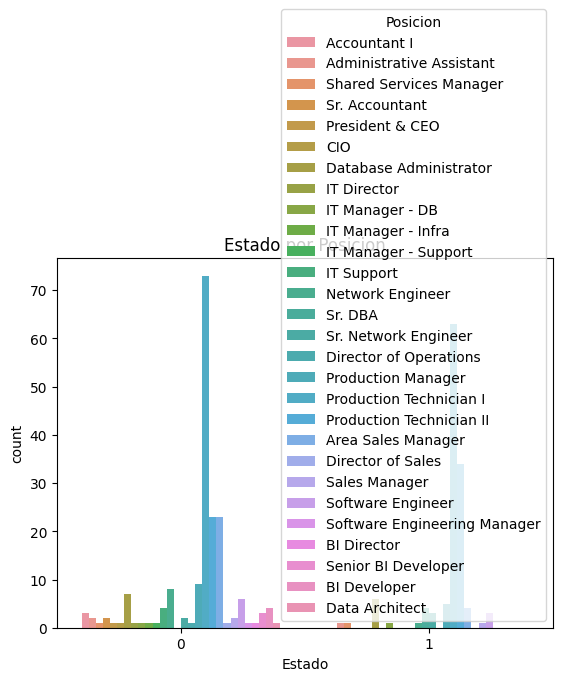

Posicion,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Architect,Database Administrator,Director of Operations,Director of Sales,...,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer,All
Estado,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.666667,0.851852,1.0,1.0,1.0,1.0,0.538462,1.0,1.0,...,0.403509,0.666667,1.0,0.5,0.666667,1.0,1.0,0.0,0.4,0.590323
1,0.0,0.333333,0.148148,0.0,0.0,0.0,0.0,0.461538,0.0,0.0,...,0.596491,0.333333,0.0,0.5,0.333333,0.0,0.0,1.0,0.6,0.409677


In [19]:
# posicion
sns.countplot(x='Estado', hue='Posicion', data=df)
plt.title('Estado por Posicion')
plt.show()

pd.crosstab(df['Estado'], df['Posicion'], margins=True)
pd.crosstab(df['Estado'], df['Posicion'], normalize='index', margins=True)
pd.crosstab(df['Estado'], df['Posicion'], normalize='columns', margins=True)


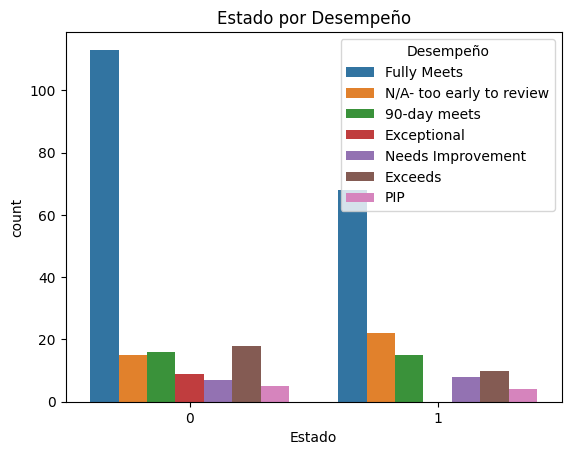

Desempeño,90-day meets,Exceeds,Exceptional,Fully Meets,N/A- too early to review,Needs Improvement,PIP,All
Estado,,,,,,,,
0,0.516129,0.642857,1.0,0.624309,0.405405,0.466667,0.555556,0.590323
1,0.483871,0.357143,0.0,0.375691,0.594595,0.533333,0.444444,0.409677


In [20]:
# desempeño
sns.countplot(x='Estado', hue='Desempeño', data=df)
plt.title('Estado por Desempeño')
plt.show()

pd.crosstab(df['Estado'], df['Desempeño'], margins=True)
pd.crosstab(df['Estado'], df['Desempeño'], normalize='index', margins=True)
pd.crosstab(df['Estado'], df['Desempeño'], normalize='columns', margins=True)


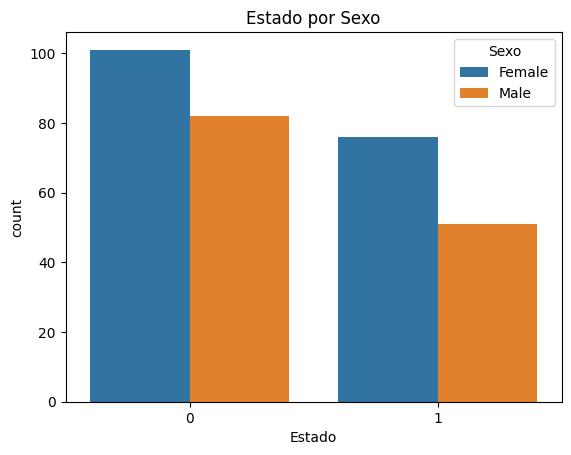

Sexo,Female,Male,All
Estado,,,
0,0.570621,0.616541,0.590323
1,0.429379,0.383459,0.409677


In [21]:
# sexo
sns.countplot(x='Estado', hue='Sexo', data=df)
plt.title('Estado por Sexo')
plt.show()

pd.crosstab(df['Estado'], df['Sexo'], margins=True)
pd.crosstab(df['Estado'], df['Sexo'], normalize='index', margins=True)
pd.crosstab(df['Estado'], df['Sexo'], normalize='columns', margins=True)


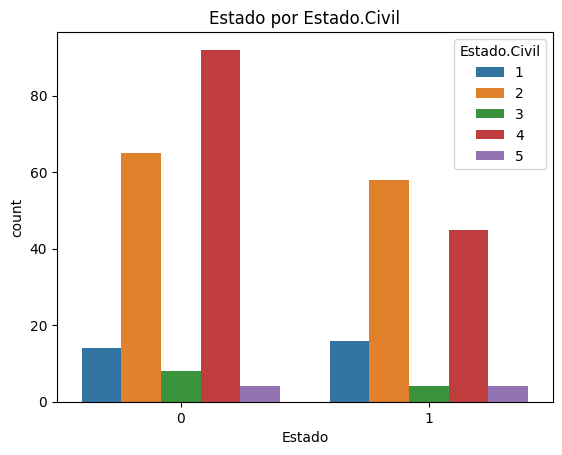

Estado.Civil,1,2,3,4,5,All
Estado,,,,,,
0,0.466667,0.528455,0.666667,0.671533,0.5,0.590323
1,0.533333,0.471545,0.333333,0.328467,0.5,0.409677


In [36]:
# estado civil
sns.countplot(x='Estado', hue='Estado.Civil', data=df)
plt.title('Estado por Estado.Civil')
plt.show()

pd.crosstab(df['Estado'], df['Estado.Civil'], margins=True)
pd.crosstab(df['Estado'], df['Estado.Civil'], normalize='index', margins=True)
pd.crosstab(df['Estado'], df['Estado.Civil'], normalize='columns', margins=True)


In [37]:
# estadisticas
pd.crosstab(df['Estado'], df['Departamento'], margins=True).apply(lambda r: r/r.sum(), axis=1)




Departamento,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering,All
Estado,,,,,,,
0,0.021858,0.002732,0.095628,0.289617,0.071038,0.019126,0.5
1,0.007874,0.000000,0.059055,0.401575,0.019685,0.011811,0.5
All,0.016129,0.001613,0.080645,0.335484,0.050000,0.016129,0.5


In [38]:
pd.crosstab(df['Estado'], df['Posicion'], margins=True).apply(lambda r: r/r.sum(), axis=1)


Posicion,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Architect,Database Administrator,Director of Operations,Director of Sales,...,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer,All
Estado,,,,,,,,,,,,,,,,,,,,,
0,0.008197,0.005464,0.062842,0.010929,0.002732,0.002732,0.002732,0.019126,0.002732,0.002732,...,0.062842,0.005464,0.008197,0.002732,0.016393,0.002732,0.005464,0.000000,0.005464,0.5
1,0.000000,0.003937,0.015748,0.000000,0.000000,0.000000,0.000000,0.023622,0.000000,0.000000,...,0.133858,0.003937,0.000000,0.003937,0.011811,0.000000,0.000000,0.015748,0.011811,0.5
All,0.004839,0.004839,0.043548,0.006452,0.001613,0.001613,0.001613,0.020968,0.001613,0.001613,...,0.091935,0.004839,0.004839,0.003226,0.014516,0.001613,0.003226,0.006452,0.008065,0.5


Las variables categoricas son: sexo, estado civil, departamento, posicion y desempeño.
Se puede ver que las variables sexo y estado civil no son significativas
para modelar la probabilidad de que el trabajador sea desvinculado a la empresa
ya que no hay diferencias significativas entre los grupos
en cambio las variables departamento, posicion y desempeño si son significativas
para modelar la probabilidad de que el trabajador sea desvinculado a la empresa
ya que hay diferencias significativas entre los grupos

In [39]:
# Separación de datos en 80/20 

from sklearn.model_selection import train_test_split


print(df.info())

#convert to Deparment to array



# convertir variables categoricas a numericas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Departamento'] = le.fit_transform(df['Departamento'])
df['Posicion'] = le.fit_transform(df['Posicion'])
df['Desempeño'] = le.fit_transform(df['Desempeño'])

# separar datos

X = df[['Departamento', 'Posicion', 'Desempeño']]
y = df['Estado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Estado           310 non-null    category
 1   Edad             310 non-null    float64 
 2   Ratio.Pago       310 non-null    float64 
 3   Salario          310 non-null    float64 
 4   Dias.trabajados  310 non-null    int64   
 5   Ausencias        310 non-null    int64   
 6   Sexo             310 non-null    category
 7   Estado.Civil     310 non-null    category
 8   Departamento     310 non-null    category
 9   Posicion         310 non-null    category
 10  Desempeño        310 non-null    object  
dtypes: category(5), float64(3), int64(2), object(1)
memory usage: 18.1+ KB
None


In [57]:
# Modelo de Regresión logistica

# modelos
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# prediccion
y_pred = modelo.predict(X_test)

# metricas
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Matriz de confusión: \n', confusion_matrix(y_test, y_pred))
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print('Reporte de clasificación: \n', classification_report(y_test, y_pred))


Matriz de confusión: 
 [[31  3]
 [21  7]]
Exactitud: 0.61
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.91      0.72        34
           1       0.70      0.25      0.37        28

    accuracy                           0.61        62
   macro avg       0.65      0.58      0.54        62
weighted avg       0.64      0.61      0.56        62



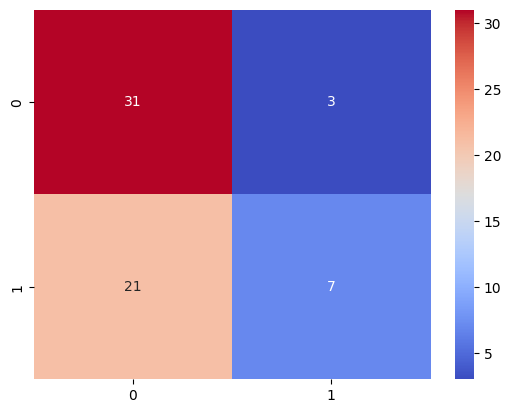

In [56]:
# grafico matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm")
plt.show()

